<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


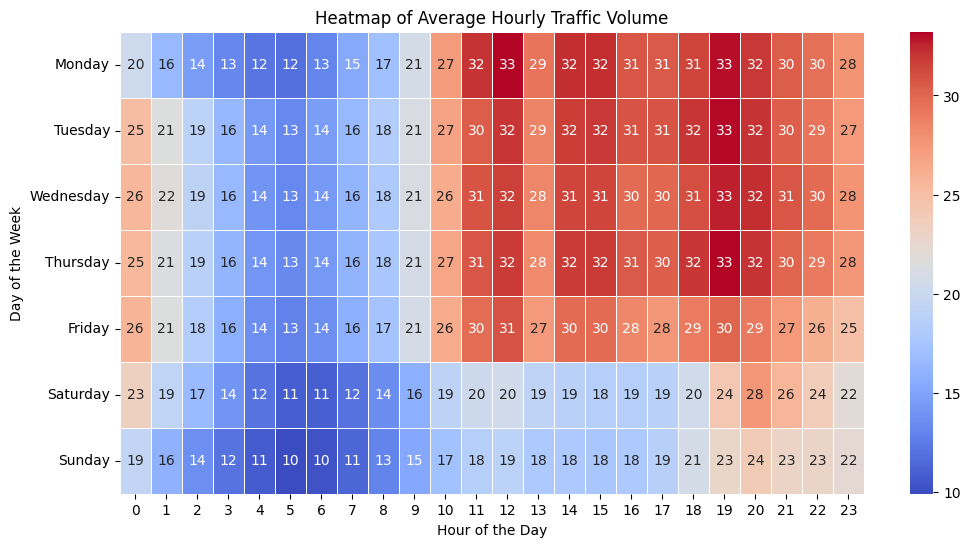

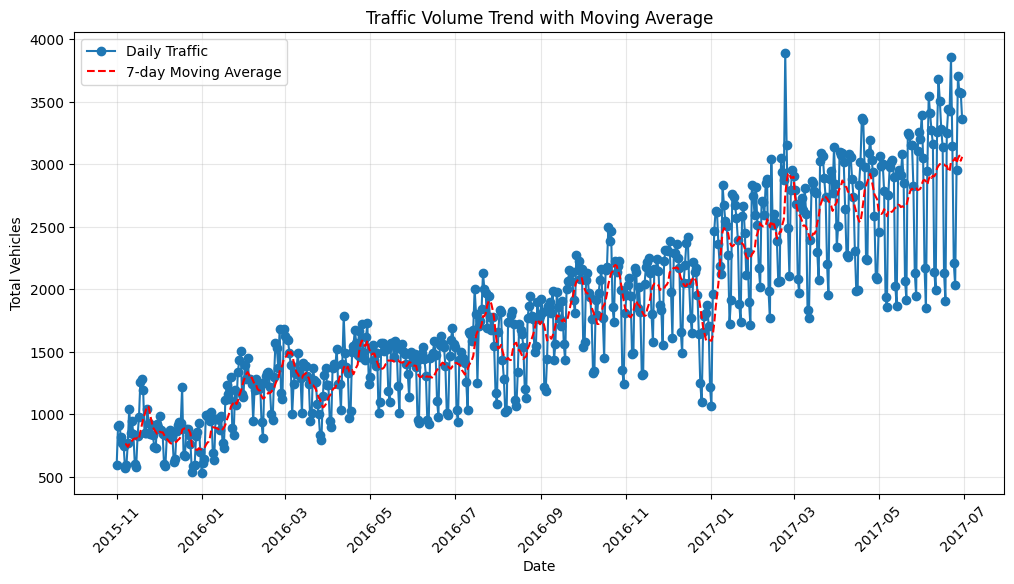

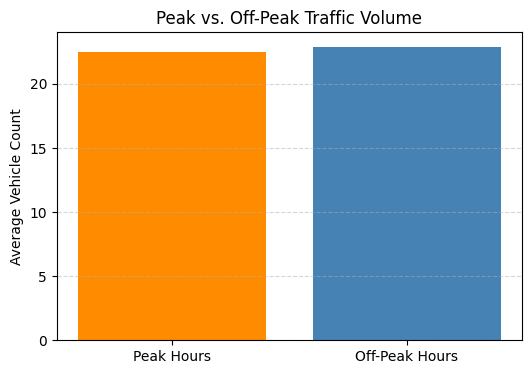

Average traffic volume during peak hours: 22.51 vehicles
Average traffic volume during off-peak hours: 22.88 vehicles
Peak Traffic Hour: 19:00 with 29.85 average vehicles.
Busiest Traffic Day: Tuesday with 25.29 average vehicles.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/traffic.csv"  # Adjust if necessary
df = pd.read_csv(file_path)

# Display basic info
print(df.info())
print(df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Convert DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract features
df['hour'] = df['DateTime'].dt.hour
df['day_of_week'] = df['DateTime'].dt.day_name()
df['date'] = df['DateTime'].dt.date  # Extract date for trend analysis

# Group by hour to find average traffic volume
hourly_traffic = df.groupby('hour')['Vehicles'].mean()

# Group by day to find average traffic volume
daily_traffic = df.groupby('day_of_week')['Vehicles'].mean()

# Sort days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic = daily_traffic.reindex(day_order)

# **1. Traffic Density Classification**
def classify_traffic(volume):
    if volume < df['Vehicles'].quantile(0.33):
        return 'Low'
    elif volume < df['Vehicles'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'

df['traffic_density'] = df['Vehicles'].apply(classify_traffic)

# **2. Heatmap of Hourly Traffic Trends**
traffic_pivot = df.pivot_table(index='day_of_week', columns='hour', values='Vehicles', aggfunc='mean')
traffic_pivot = traffic_pivot.reindex(day_order)

plt.figure(figsize=(12, 6))
sns.heatmap(traffic_pivot, cmap='coolwarm', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Heatmap of Average Hourly Traffic Volume")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.show()

# **3. Moving Average Trend for Daily Traffic**
df_daily = df.groupby('date')['Vehicles'].sum().reset_index()
df_daily['moving_avg'] = df_daily['Vehicles'].rolling(window=7).mean()  # 7-day moving average

plt.figure(figsize=(12, 6))
plt.plot(df_daily['date'], df_daily['Vehicles'], marker='o', linestyle='-', label='Daily Traffic')
plt.plot(df_daily['date'], df_daily['moving_avg'], color='red', linestyle='--', label='7-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Total Vehicles')
plt.title('Traffic Volume Trend with Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# **4. Peak vs. Off-Peak Traffic Comparison**
peak_hours = df[df['hour'].isin(range(7, 10)) | df['hour'].isin(range(17, 20))]  # Rush hours
off_peak_hours = df[~df['hour'].isin(range(7, 10)) & ~df['hour'].isin(range(17, 20))]

peak_avg = peak_hours['Vehicles'].mean()
off_peak_avg = off_peak_hours['Vehicles'].mean()

plt.figure(figsize=(6, 4))
plt.bar(['Peak Hours', 'Off-Peak Hours'], [peak_avg, off_peak_avg], color=['darkorange', 'steelblue'])
plt.ylabel('Average Vehicle Count')
plt.title('Peak vs. Off-Peak Traffic Volume')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print(f"Average traffic volume during peak hours: {peak_avg:.2f} vehicles")
print(f"Average traffic volume during off-peak hours: {off_peak_avg:.2f} vehicles")

# **5. Identifying Peak Day and Hour**
peak_hour = hourly_traffic.idxmax()
peak_hour_value = hourly_traffic.max()

peak_day = daily_traffic.idxmax()
peak_day_value = daily_traffic.max()

print(f"Peak Traffic Hour: {peak_hour}:00 with {peak_hour_value:.2f} average vehicles.")
print(f"Busiest Traffic Day: {peak_day} with {peak_day_value:.2f} average vehicles.")
